In [199]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [200]:
# Load the dataset
data = pd.read_csv('../Life_Expectancy_preprocessed_v2.csv')  # Replace 'your_data.csv' with the actual file path

# Data preprocessing
X = data[['Year', 'Adult Mortality', 'Developed']]
y = X['Developed']
X = X[['Year', 'Adult Mortality']]

Developed:  238
Developing:  1411


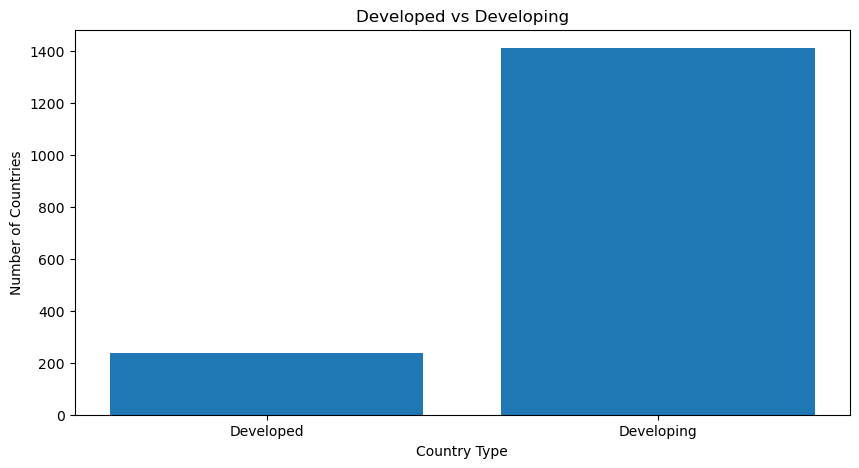

In [201]:
# Show the percentage of developed and developing countries on a graph
developed = y[y == 1]
developing = y[y == 0]
print('Developed: ', len(developed))
print('Developing: ', len(developing))
plt.figure(figsize=(10, 5))
plt.bar(['Developed', 'Developing'], [len(developed), len(developing)])
plt.title('Developed vs Developing')
plt.xlabel('Country Type')
plt.ylabel('Number of Countries')
plt.show()

In [202]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)  # 80% training and 20% test


In [203]:
#Import svm model
from sklearn import svm

#Create a svm Classifier with a non linear kernel
clf = svm.SVC(kernel='rbf', gamma='auto', C=1.0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))



Accuracy:  0.8666666666666667
Mean Squared Error:  0.13333333333333333
R2 Score:  -0.07269503546099298
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.93       282
           1       0.58      0.29      0.39        48

    accuracy                           0.87       330
   macro avg       0.74      0.63      0.66       330
weighted avg       0.84      0.87      0.85       330



In [204]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

Accuracy: 86.67%
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       282
           1       0.58      0.29      0.39        48

    accuracy                           0.87       330
   macro avg       0.74      0.63      0.66       330
weighted avg       0.84      0.87      0.85       330



In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8666666666666667
Precision: 0.5833333333333334
Recall: 0.2916666666666667


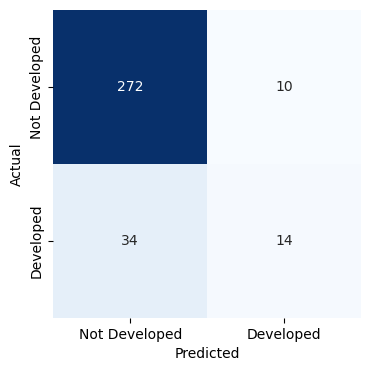

In [206]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['Not Developed', 'Developed'], yticklabels=['Not Developed', 'Developed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/Users/jules/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


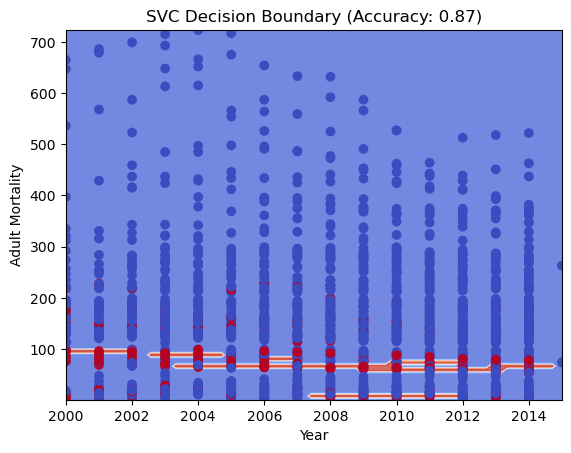

In [210]:
# Assuming clf is your SVM classifier and xx, yy define your grid
xx, yy = np.meshgrid(np.linspace(X['Year'].min(), X['Year'].max(), 100),
                    np.linspace(X['Adult Mortality'].min(), X['Adult Mortality'].max(), 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X['Year'], X['Adult Mortality'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.title(f'SVC Decision Boundary (Accuracy: {accuracy:.2f})')
# Display plots
plt.show()